###**Conjunto de datos bancarios - Objetivos de marketing**

Los depósitos a plazo son una fuente importante de ingresos para un banco.
Un depósito a plazo es una inversión en efectivo mantenida en una institución financiera. Su dinero se invierte por una tasa de interés acordada durante un período fijo de tiempo o plazo.
El banco tiene varios planes de divulgación para vender depósitos a plazo a sus
clientes, como marketing por correo electrónico, anuncios, marketing telefónico y marketing digital.
Las campañas de marketing telefónico siguen siendo una de las formas más efectivas de llegar a las personas. Sin embargo, requieren una gran inversión, ya que se contratan grandes centros de llamadas para ejecutar estas campañas. Por lo tanto, es crucial identificar a los clientes con más probabilidades de convencer de antemano para que puedan ser dirigidos específicamente a través de una llamada.

**Descripciones detalladas de las columnas**

**Datos del cliente bancario:**

* 1 - edad (numérica)
* 2 - trabajo: tipo de trabajo (categórico: "admin.","desconocido","desempleado","gestión","empleada doméstica","empresario","estudiante", "obrero","autónomo","jubilado","técnico","servicios")
* 3 - marital : estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)
* 4 - Educación (categórica: "desconocido", "secundario", "primario",
"terciario")
* 5 - Incumplimiento: ¿Tiene crédito en mora? (binario: "sí","no")
* 6 - Saldo: Saldo medio anual, en euros (numérico)
* 7 - Vivienda: ¿Tiene préstamo de vivienda? (binario: "sí","no")
* 8 - Préstamo: ¿Tiene préstamo personal? (binario: "sí","no")
**Relacionado con el último contacto de la campaña actual:**
* 9 - Contacto: Tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")
* 10 - día: último contacto día del mes (numérico)
* 11 - mes: último contacto mes del año (categórico: "ene", "feb", "mar", ..., "nov", "dic")
* 12 - duración: duración del último contacto, en segundos (numérico)

 **Otros atributos:**
* 13 - Campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
* 14 - días: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)
* 15 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
* 16 - Poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")


**Variable de salida (objetivo deseado):**
* 17 - y - ¿El cliente ha suscrito un depósito a plazo? (binario: "sí","no")

El en la primera estapa de este proyecto se utilizara la parte de test del datase, y luego cuanto se someta el dataset a la parte de evaluacion se podria utilizar el dataset train. Caso que se requiere, se podrian aderir ambos datset con el finde de que pueda arrojar distintos resultados al momento de la evaluacion ya que la divicion entre test y train el programa lo realiza de manera aleatoria

El objetivo, como antes se menciona, es identidificar a aquellas personas que tengan mayor probabilidad de convencerlas mediante una comunicacion telefonica para que acepte deositar su dinero a plazo fijo en el banco.
Por lo tanto, y en contexto de aquellos clientes, nos preguntamos:
* Influye la edad de los clientes y sus ingresos?
* Influye su situacion crediticia?
* La cantidad de minutos de conversacion que se mantuvo?
* Existira correlacion entre la ultima campania de marketin telefonico y la presente?

In [ ]:
#importar librerias y descarga de dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import platform
if os.access('test.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/test.csv
    else:
        !wget https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/test.csv

In [ ]:
#descarga del dataset
if os.access('train.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/train.csv
    else:
        !wget https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/train.csv

In [ ]:
#lectura de ambos dataset
df1 = pd.read_csv('test.csv',sep = ';')
df2 = pd.read_csv('train.csv',sep = ';')


In [ ]:
df = pd.concat([df1,df2], axis=0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
#renombrar columnas del dataset
df.columns = ['edad', 'tipo_trabajo','estado_civil', 'educacion', 'moratoria', 'ingresos', 'hipoteca', 'prestamo', 'contacto', 'dia', 'mes', 'duracion', 'contactado','dias_camp_anterior','contactos_camp_anterior','resultado_camp_anterior','y']
df.head()

,edad,tipo_trabajo,estado_civil,educacion,moratoria,ingresos,hipoteca,prestamo,contacto,dia,mes,duracion,contactado,dias_camp_anterior,contactos_camp_anterior,resultado_camp_anterior,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


En este grafico podemos ver que una gran mayoria no contratan el servicio y que segun la edad y los ingresos no hay parametros especificos que nos brinde señales para determinar contrataciones.

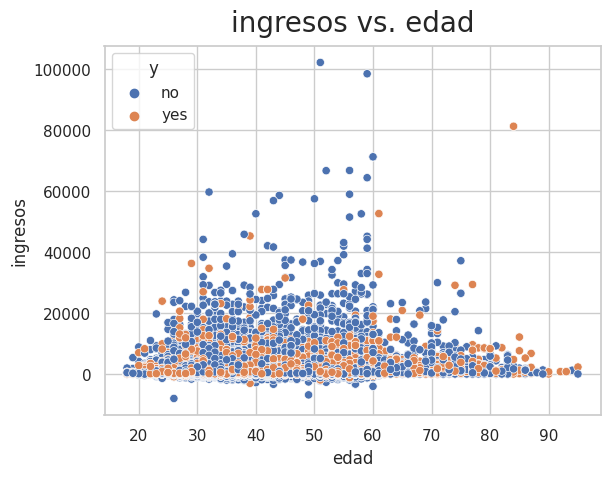

In [ ]:
#Influye la edad de los clientes?
sns.scatterplot(x='edad',y='ingresos', hue = 'y', data = df)
plt.title("ingresos vs. edad", fontsize=20, verticalalignment='bottom');
plt.xlabel("edad");
plt.ylabel("ingresos");

Con respecto a su situacion crediticia, una cuestion logica a la hora de contratar un servicio de plazo fijo, ya que se supone que un contexto de deuda o moratoria seria menos probable que una persona utilice un servicio que esta apuntado al ahorro; podemos ver en primer caso no tantos clientes consumen prestamos y no poseen moratoria, sin embargo un gran numero de clientes si posee un credito hipotecario, en donde se deja ver un pequeño numero de personas que cotratan el servicio de plazo fijo ademas de tener un credito hipotecario, de todas maneras no se visualiza un patron especifico, o una señal para indagar mas por este lado.


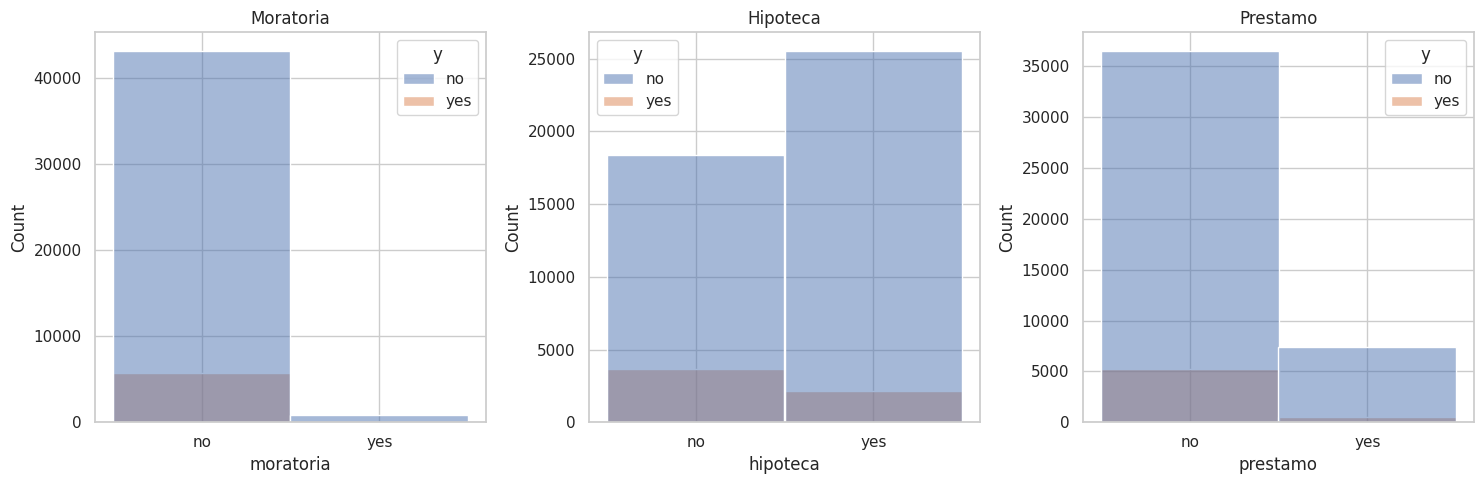

In [ ]:
#Influye su situacion crediticia ?
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x='moratoria', hue='y', ax=axes[0])
axes[0].set_title('Moratoria')

sns.histplot(data=df, x='hipoteca', hue='y', ax=axes[1],)
axes[1].set_title('Hipoteca')

# Gráfico 3: Box plot
sns.histplot(data=df, x='prestamo', hue='y', ax=axes[2])
axes[2].set_title('Prestamo')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


En el siguiente grafico queda claramente demostrado que cantidad de personas han contratado el servicio, donde se puede apreciar una gran mayoria que no lo ha contratado, se podria reeplantear una hipotesis en donde nos preguntemos, porque No contratan el servicio de plazo fijo? cual o cuales pueden ser lo motivos? sirven realmente las campañas telefonicas?.

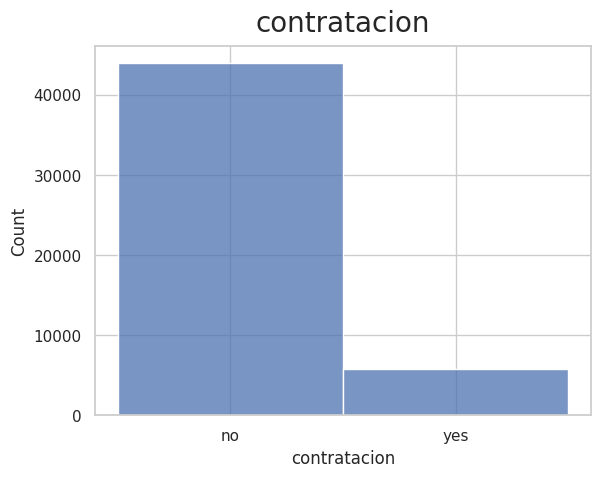

In [ ]:
 #cuantos registros de cotratacion hay?
sns.histplot(x='y', data = df)
plt.title("contratacion", fontsize=20, verticalalignment='bottom');
plt.xlabel("contratacion");


Este grafico demuestra una obviedad, en donde hubo mayor tiempo de conversacion telefonica es donde el cliente contrato el servicio. Reeplanteo de hipotesis: Sera un factor el tiempo que se debe dedicar a una llamada telefonica para contratar el servicio que los clientes no disponen para destinarle?

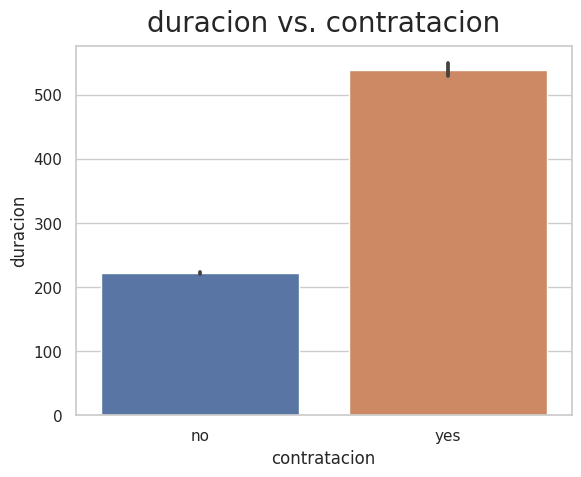

In [ ]:
# cantidad de minutos de conversacion que se mantuvo?
sns.barplot(x='y',y='duracion', data = df)
plt.title("duracion vs. contratacion", fontsize=20, verticalalignment='bottom');
plt.xlabel("contratacion");
plt.ylabel("duracion");

En el siguiente grafico se intenta realizar una comparacion mas que correlacion en donde se quiere mostrar resultados de la campaña de marketing anterior con la prensente, en donde se muestra claro el numero de clientes que no se supo que desicion tomo la campaña anterior, sin embargo dentro de ese grupo es donde se muestra la mayor cantidad de contrataciones. En definitiva, suele ser tentativo que a travez de comunicacion telefonica no queda claro el deseo tentativo del cliente de contratar el servicio o no.

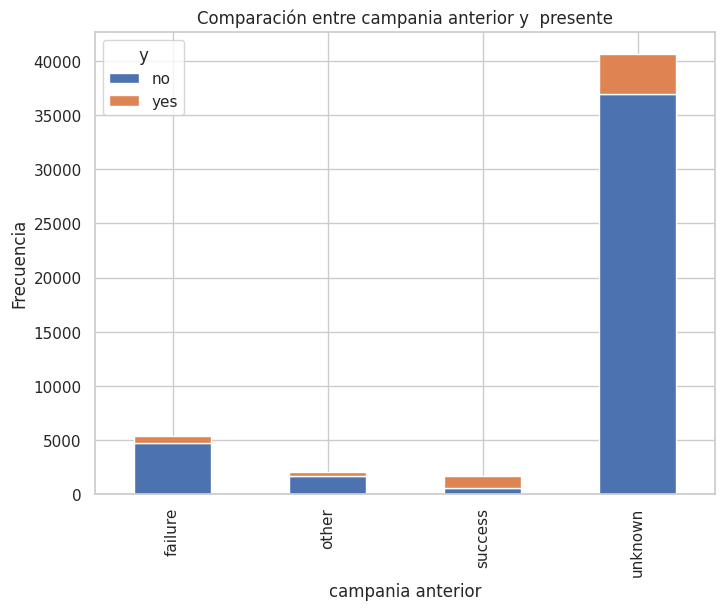

In [ ]:
#Existira correlacion entre la ultima campania de marketin telefonico y la presente?

# Crear un gráfico de barras apiladas
sns.set(style="whitegrid")  # Establecer el estilo del gráfico

# Contar las frecuencias de cada categoría en Variable1 y Variable2
count_data = df.groupby(['resultado_camp_anterior', 'y']).size().unstack(fill_value=0)

# Graficar las barras
count_data.plot(kind='bar', stacked=True, figsize=(8, 6))

# Personalizar etiquetas y títulos
plt.xlabel('campania anterior')
plt.ylabel('Frecuencia')
plt.title('Comparación entre campania anterior y  presente')

# Mostrar el gráfico
plt.legend(title='y')
plt.show()

En esta siguiente etapa (estructurando un modelo ds parte 2), se hara foco en los clientes que han contratado el servicio con el fin de entender un poco mas el porque y encontrar algun patron en comun si es que existe.


In [ ]:
# eliminar todos los que no hallan contratado el servicio
df_y = df.copy()
valor = "no"
df_y = df_y.drop(df_y[df_y['y'] == valor].index)
df_y.head()

,edad,tipo_trabajo,estado_civil,educacion,moratoria,ingresos,hipoteca,prestamo,contacto,dia,mes,duracion,contactado,dias_camp_anterior,contactos_camp_anterior,resultado_camp_anterior,y
83,52,services,married,secondary,no,657,no,no,telephone,7,jul,398,2,460,2,failure,yes
129,77,retired,divorced,tertiary,no,4659,no,no,cellular,14,apr,161,1,-1,0,unknown,yes
512,52,technician,married,secondary,no,195,yes,no,cellular,18,feb,220,1,63,5,failure,yes
849,55,housemaid,divorced,primary,no,976,no,no,cellular,28,jun,345,1,94,3,other,yes
1124,37,technician,married,unknown,no,189,no,no,cellular,1,oct,238,1,107,2,success,yes


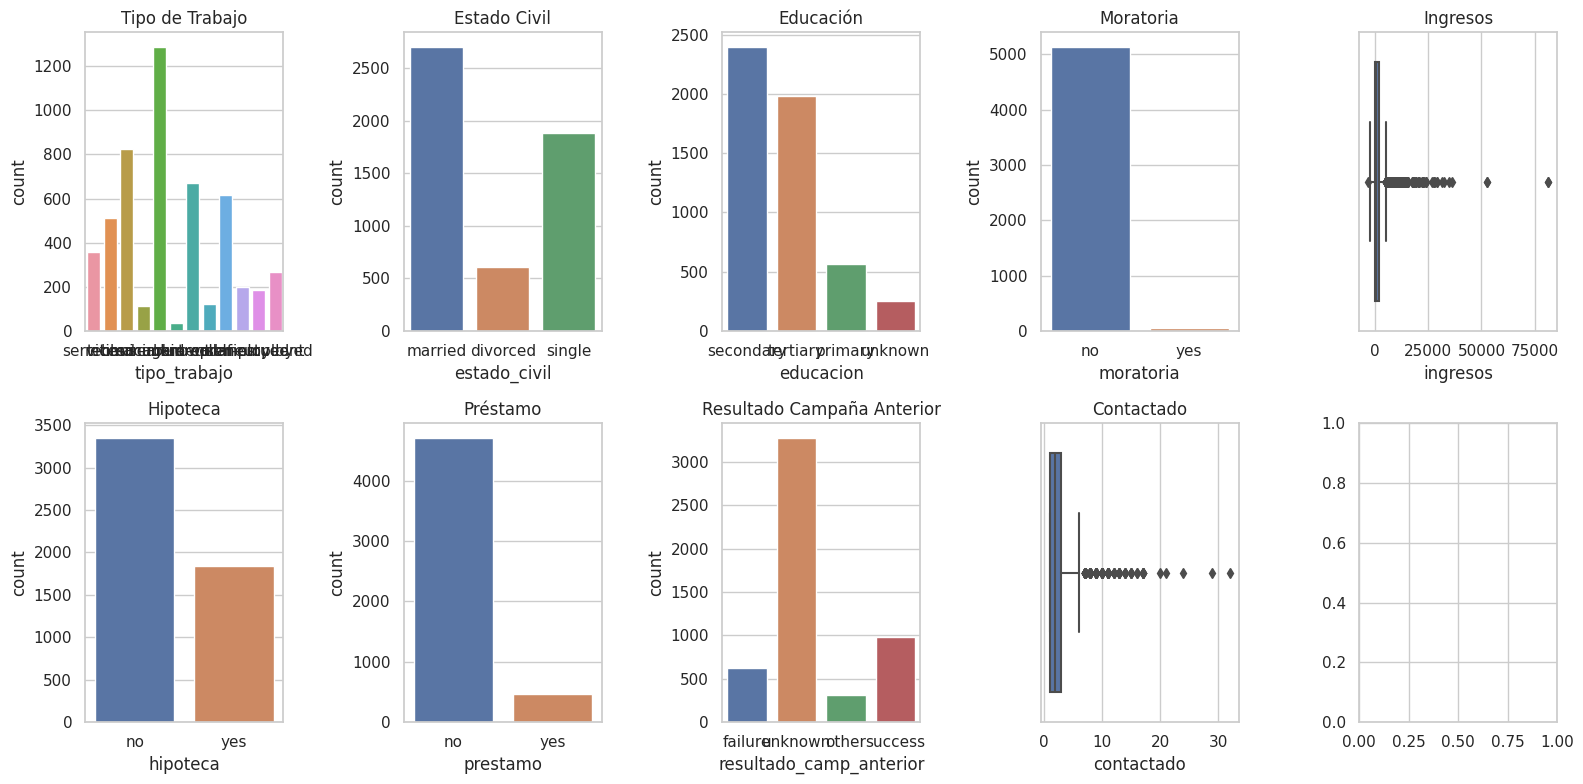

In [ ]:

# Crear una figura con una cuadrícula de 2 filas y 5 columnas para los gráficos
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

# Gráfico 1
sns.countplot(data=df_y, x='tipo_trabajo', ax=axes[0, 0])
axes[0, 0].set_title('Tipo de Trabajo')

# Gráfico 2
sns.countplot(data=df_y, x='estado_civil', ax=axes[0, 1])
axes[0, 1].set_title('Estado Civil')

# Gráfico 3
sns.countplot(data=df_y, x='educacion', ax=axes[0, 2])
axes[0, 2].set_title('Educación')

# Gráfico 4
sns.countplot(data=df_y, x='moratoria', ax=axes[0, 3])
axes[0, 3].set_title('Moratoria')

# Gráfico 5
sns.boxplot(data=df_y, x='ingresos', ax=axes[0, 4])
axes[0, 4].set_title('Ingresos')

# Gráfico 6
sns.countplot(data=df_y, x='hipoteca', ax=axes[1, 0])
axes[1, 0].set_title('Hipoteca')

# Gráfico 7
sns.countplot(data=df_y, x='prestamo', ax=axes[1, 1])
axes[1, 1].set_title('Préstamo')

# Gráfico 8
sns.countplot(data=df_y, x='resultado_camp_anterior', ax=axes[1, 2])
axes[1, 2].set_title('Resultado Campaña Anterior')

# Gráfico 9 (nuevo gráfico)
sns.boxplot(data=df_y, x='contactado', ax=axes[1, 3])  # Agregar el nuevo gráfico
axes[1, 3].set_title('Contactado')

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


En este paquete de graficos, a simple viste se deja ver un patron que puede tener vincuo entre los que contratron, y son los grafico relacionados a la parte crediticia, es decir, la mayoria no posee hipoteca, ni mora, ni tampoco prestamos. Vemos tambien que se en la gran mayoria se establecieron pocos contactos telefonicos y que los ingresos no superan los 10mil usd.

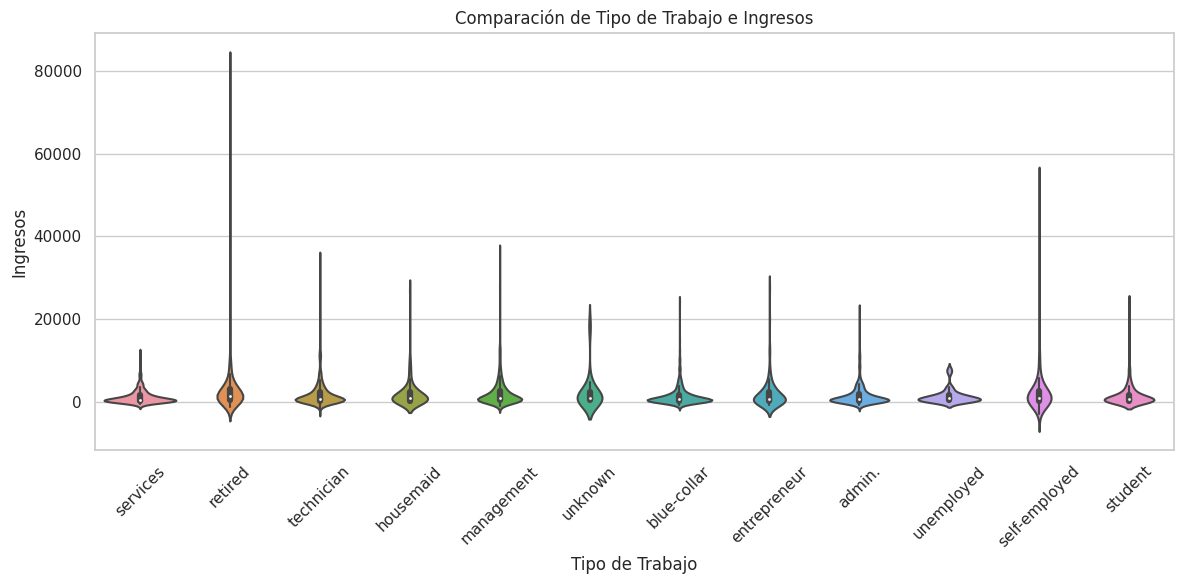

In [ ]:
# tipo de trabajo segun ingresos

# Crear un gráfico de violín para comparar el tipo de trabajo y los ingresos
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_y, x='tipo_trabajo', y='ingresos')
plt.title('Comparación de Tipo de Trabajo e Ingresos')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

En este grafico vemos que retired y self-empoyed son  los que tal vez perciben mejores ingresos

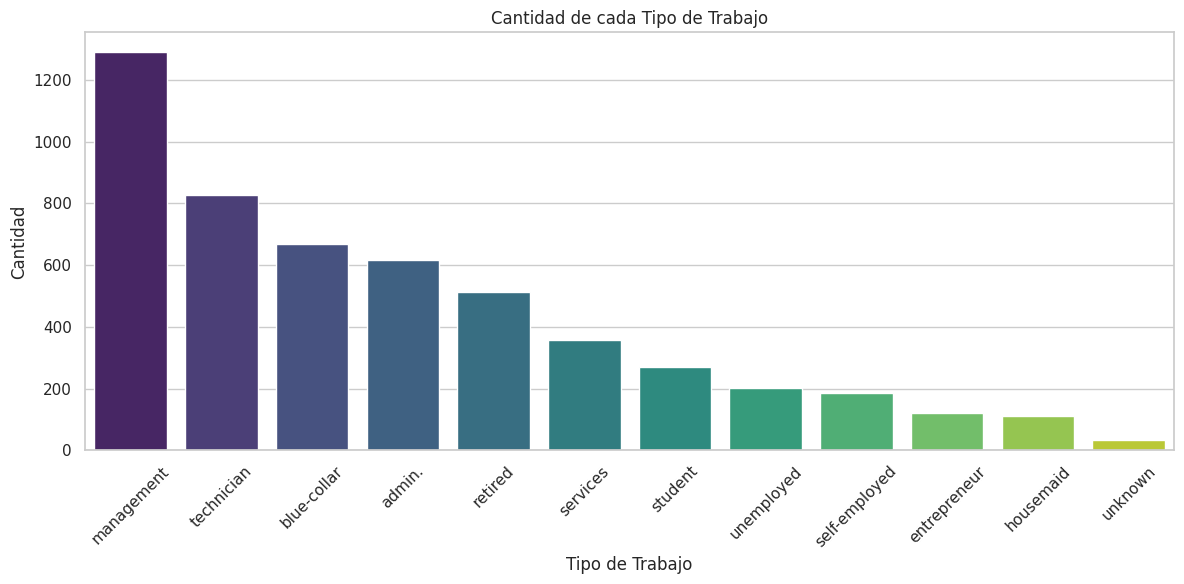

In [ ]:

# Calcular el recuento de cada tipo de trabajo
tipo_trabajo_counts = df_y['tipo_trabajo'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=tipo_trabajo_counts.index, y=tipo_trabajo_counts.values, palette='viridis')
plt.title('Cantidad de cada Tipo de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sin embargo, vemos que management es el tipo de trabajo que mas contrato el servicio, dentro de los contratados, no existe correlacion entre los tipo e trabajo que perciben maores ingresos, como vimos en el grfico anterior

#Contexto Comercial:

Los depósitos a plazo son una fuente fundamental de ingresos para las instituciones bancarias. Estos depósitos representan inversiones a corto plazo realizadas por los clientes, en las cuales se acuerda una tasa de interés fija durante un período determinado. Los bancos emplean diversas estrategias de marketing para promover estos productos financieros, incluyendo campañas por correo electrónico, anuncios, marketing telefónico y marketing digital. Las campañas de marketing telefónico son altamente efectivas para involucrar a los clientes, pero requieren una inversión significativa en centros de llamadas. Por lo tanto, resulta crítico identificar a los clientes con mayor probabilidad de aceptar un depósito a plazo durante estas llamadas, optimizando así los recursos y aumentando la tasa de éxito.



#Problema Comercial:

El problema comercial radica en la optimización de las campañas de marketing telefónico para la venta de depósitos a plazo en el banco. Se busca identificar a priori a los clientes con mayores probabilidades de aceptar la oferta, lo que permitiría dirigir los esfuerzos de llamadas telefónicas hacia estos segmentos de clientes. Esto, a su vez, reduciría los costos operativos y aumentaría la eficacia de las campañas.



#Contexto Analítico:

El contexto analítico se enfoca en el análisis de datos relacionados con los clientes y las interacciones de marketing. El dataset proporciona información detallada sobre los clientes, incluyendo su edad, estado civil, educación, historial crediticio y saldos promedio anuales. Además, se registran detalles sobre las interacciones de marketing, como el tipo de contacto, la duración de las llamadas, el resultado de la campaña anterior y si el cliente finalmente suscribió un depósito a plazo.



#Estructurando un proyeto DS parte 3


In [ ]:
# Se selecciona el modelo Forwars seleccion
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
X = df.drop("y", 1)       # feature matrix
y = df['y']               # target feature


<ipython-input-16-1846a978bbda>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("y", 1)       # feature matrix


In [ ]:
df.dtypes

edad                        int64
tipo_trabajo               object
estado_civil               object
educacion                  object
moratoria                  object
ingresos                    int64
hipoteca                   object
prestamo                   object
contacto                   object
dia                         int64
mes                        object
duracion                    int64
contactado                  int64
dias_camp_anterior          int64
contactos_camp_anterior     int64
resultado_camp_anterior    object
y                          object
dtype: object

In [ ]:

df['tipo_trabajo'] = df['tipo_trabajo'].replace(valor_no_valido, '').astype(str)
df['estado_civil'] = df['estado_civil'].astype(str)
df['educacion'] = df['educacion'].astype(str)
df['moratoria'] = df['moratoria'].astype(str)
df['hipoteca'] = df['hipoteca'].astype(str)
df['prestamo'] = df['prestamo'].astype(str)
df['contacto'] = df['contacto'].astype(str)
df['mes'] = df['mes'].astype(str)
df['resultado_camp_anterior'] = df['resultado_camp_anterior'].astype(str)
df['y'] = df['y'].astype(str)

In [ ]:
df.dtypes

edad                        int64
tipo_trabajo               object
estado_civil               object
educacion                  object
moratoria                  object
ingresos                    int64
hipoteca                   object
prestamo                   object
contacto                   object
dia                         int64
mes                        object
duracion                    int64
contactado                  int64
dias_camp_anterior          int64
contactos_camp_anterior     int64
resultado_camp_anterior    object
y                          object
dtype: object

In [ ]:
forward_selection(X,y)

<ipython-input-18-f58aff5ad523>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


ValueError: ignored

In [ ]:
!pip install mlxtend

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features